# Bank Churning

## Business Objective:
Identify key patterns and factors that determine attrition rate.

## Data Model Objective:
Build a model that predicts whether a customer is going to churn.

### Dataset
We will be using a credit card service company dataset from Kaggle (https://www.kaggle.com/sakshigoyal7/credit-card-customers).  

### Why is identifying churn so important?
In general, here are three ways a company can increase their revenue:
1. Upsell to existing customers: Enhancing or improving products the products a customer is already buying.
2. Acquire new customers
3. Increase retention rate / lower churn

Acquiring new customers costs much more than retaining them. As stated, we will focus on how a company can identify whether a customer can churn. Once a model that can identify the types of customers who are likely to churn or provide a probability of people who are likely to churn at any given time, business solutions such as issuing a retention campaign or promotion can be put into place to target those most prone to churning.


## Questions I want to answer:

- Classification
    - What are the some specific behavior patterns that reveal potential churners? (anomaly detection)
- ML Solution: Build predictive model
- Business Solution: Determine high risk customers and target a retention campaign
- Regression

Probability they will churn in day X

Expected time to churn - regression

- To prevent churn: company based improvements, customer based marketing
- In churn prediction:
    - Be aware of class skew
    - Consider both customer attributes and customer networks
    - Interpretability, not just accuracy

Stats question

What is the probability someone will churn?

### Who are the most profitable customers...

According to the New York Times, "" (https://www.nytimes.com/2013/11/08/business/economy/a-credit-card-rule-that-worked-for-consumers.html)

#### in terms of average card utilization ratio?

#### in terms of total transaction amount?

# Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.pyplot import figure

import scipy.stats as stats
from scipy.stats import chisquare
from sklearn import tree
import matplotlib.patches as mpatches
import itertools

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier


# check version number
import imblearn
print(imblearn.__version__)
1
2
3
# check version number
import imblearn
print(imblearn.__version__)

import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

0.8.0
0.8.0


In [ ]:
# drop unnecessary columns 
bank_churners = pd.read_csv('Data/BankChurners.csv').iloc[:,1:-2]

# replace existing customer to 0 and attrited customer to 1
bank_churners['Attrition_Flag'] = bank_churners['Attrition_Flag'].map({'Existing Customer' : 0, 'Attrited Customer' : 1})
bank_churners

### Bank Churners Table

- `Attrition_Flag`: Internal event (customer activity) variable - if the account is closed then 1 else 0
- `Customer_Age`: Demographic variable - Customer's Age in Years
- `Gender`: Demographic variable - M=Male, F=Female
- `Dependent_count`: Demographic variable - Number of dependents
- `Education_Level`: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- `Marital_Status`: Demographic variable - Married, Single, Divorced, Unknown
- `Income_Category`: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
- `Card_Category`: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- `Months_on_book`: Period of relationship with bank
- `Total_Relationship_Count`: Total no. of products held by the customer
- `Months_Inactive_12_mon`: No. of months inactive in the last 12 months
- `Contacts_Count_12_mon`: No. of Contacts in the last 12 months
- `Credit_Limit`: Credit Limit on the Credit Card
- `Total_Revolving_Bal`: Total Revolving Balance on the Credit Card
- `Avg_Open_To_Buy`: Open to Buy* Credit Line (Average of last 12 months)
- `Total_Amt_Chng_Q4_Q1`: Change in Transaction Amount (Q4 over Q1)
- `Total_Trans_Amt`: Total Transaction Amount (Last 12 months)
- `Total_Trans_Ct`: Total Transaction Count (Last 12 months)
- `Total_Ct_Chng_Q4_Q1`: Change in Transaction Count (Q4 over Q1) 
- `Avg_Utilization_Ratio`: Average Card Utilization Ratio***


*Open-to-buy: The difference between the credit limit assigned to a cardholder account and the present balance on the account.

***Average Card Utilization Ratio: Amount client owes divided by credit limit. (Total_Revolving_Bal / Credit_Limit)


In [ ]:
# count of records and columns
bank_churners.shape

In [ ]:
bank_churners.head()

In [ ]:
# look at datatypes and missing values
bank_churners.info()

In [ ]:
# unique values per feature
for col in bank_churners.columns:
    num_values = bank_churners[col].nunique()
    print(col, ": ", num_values)

### Distinguishing Categorical and Numeric Variables 

Although Total_Relationship_Count, Months_Inactive_12_mon, and Contacts_Count_12_mon are numeric features, we will classify them as categorical variables becuase they have a small amount of unique values.

In [ ]:
categorical_columns = list(bank_churners.select_dtypes('object').columns)
categorical_columns.extend(['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'])
print("Categorical Features: ",categorical_columns)
print()
numerical_columns = list(bank_churners.select_dtypes(exclude=['object']).columns)
numerical_columns = [i for i in numerical_columns if i not in ('Dependent_count','Attrition_Flag','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon')]
print("Numerical Features: ", numerical_columns)
print()
print('Target Variable: Attrition_Flag')

# includes attrition
numerical_columns_attrition = list(bank_churners.select_dtypes(exclude=['object']).columns)
numerical_columns_attrition = [i for i in numerical_columns if i not in ('Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon')]

In [ ]:
not_churned = bank_churners[bank_churners['Attrition_Flag'] == 0]
churned = bank_churners[bank_churners['Attrition_Flag'] == 1]
display(not_churned.describe())
churned.describe()

In [ ]:
print('Percentage of Credit Card Users Who Attrited:', np.round(len(churned) / len(bank_churners) * 100, 2), '%')
print('Percentage Unknown Variables:', np.round(len(bank_churners[bank_churners.replace('Unknown',np.nan).isna().any(axis=1)]) / len(bank_churners) * 100,2), '%')

# 2. Exploratory Data Analysis

2.1 Handling Missing Data
- Heatmap
- Countplot
- Venn Diagram
- Observations

2.1.1 Imputing Missing Values
- Create missing column 
- Random Forest
- Countplot
- Observations

2.2 Univariate Analysis (Descriptive)

2.2.1 Categorical Data
- Frequency Count
- Frequency Count by Attrition
- Frequency Percentage by Attrition
- Observations

2.2.2 Numerical Data
- Distribution Plots
- Distribution Plots by Attrition
- Observations

2.3 Bivariate Analysis (Correlation)

2.3.1 Categorical vs. Categorical
- Pointplot
- Chi-Squared Test
- Chi-Squared Test with Attrition
- Observations

2.3.2 Numerical vs. Numerical
- Scatterplots 
- Spearman Correlation
- Pearson Correlation
- Observations

2.3.3 Categorical vs. Numerical
- Histogram
- Normality Test
- Wilcoxon-Rank Sum Test
- Observations

2.4 Key Findings



# 2.1: Visualizing Missing Data

### Heatmap

In [ ]:
sns.heatmap(bank_churners.replace('Unknown',np.nan).isnull())

### Distribution of Columns with Missing Values

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=bank_churners[col].value_counts().index,height=bank_churners[col].value_counts(normalize=True),color = 'blue')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    count+=1

`Marital_Status` : The customers are mostly married or single, with a similar amount claiming they were divorced or 'unknown'.

`Education_Level` : A plurality of credit card users claimed to have a least a graduate level. The unknown category ranks third in count.

`Income_Category` : The 'Unknown" category is the second to least most frequent category.

### Venn Diagram

In [ ]:
# visualizing missing values
unknown_education_level = len(bank_churners[bank_churners['Education_Level'] == 'Unknown']) / len(bank_churners)
unknown_marital_status = len(bank_churners[bank_churners['Marital_Status']== 'Unknown']) / len(bank_churners)
unknown_income_category = len(bank_churners[bank_churners['Income_Category']== 'Unknown']) / len(bank_churners)
unknown_education_level_and_marital_status_only = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') & (bank_churners['Marital_Status']== 'Unknown') & (bank_churners['Income_Category']!= 'Unknown')]) /len(bank_churners)
unknown_education_level_and_income_category_only = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') & (bank_churners['Marital_Status']!= 'Unknown') & (bank_churners['Income_Category']== 'Unknown')]) /len(bank_churners)
unknown_income_category_and_marital_status_only = len(bank_churners[(bank_churners['Education_Level'] != 'Unknown') & (bank_churners['Marital_Status']== 'Unknown') & (bank_churners['Income_Category'] == 'Unknown')]) /len(bank_churners)
unknown_total = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') | (bank_churners['Marital_Status']== 'Unknown') | (bank_churners['Income_Category']== 'Unknown')]) /len(bank_churners)

bank_churners_nan = bank_churners.replace('Unknown',np.nan)
unknown_education_level_only = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') & (bank_churners['Marital_Status']!= 'Unknown') & (bank_churners['Income_Category']!= 'Unknown')]) /len(bank_churners)
unknown_income_category_only = len(bank_churners[(bank_churners['Education_Level']!= 'Unknown') & (bank_churners['Marital_Status']!= 'Unknown') & (bank_churners['Income_Category']== 'Unknown')]) /len(bank_churners)
unknown_marital_status_only = len(bank_churners[(bank_churners['Education_Level']!= 'Unknown') & (bank_churners['Marital_Status']== 'Unknown') & (bank_churners['Income_Category']!= 'Unknown')]) /len(bank_churners)
unknown_all = len(bank_churners[(bank_churners['Education_Level']== 'Unknown') & (bank_churners['Marital_Status']== 'Unknown') & (bank_churners['Income_Category']== 'Unknown')]) /len(bank_churners)


# A: Education_Level
# B: Marital_Status
# C: Income_Category
venn3(subsets = (round(unknown_education_level_only,3), round(unknown_marital_status_only,3),
                 round(unknown_education_level_and_marital_status_only,3), round(unknown_income_category_only,3),
                 round(unknown_education_level_and_income_category_only,3),round(unknown_income_category_and_marital_status_only,3),
                 round(unknown_all,3)),
                set_labels = ('Missing Education Level', 'Missing Marital Status', 'Missing Income Category'))
plt.show()

print('Percentage of Users with Missing Education Level: ', unknown_education_level)
print('Percentage of Users with Missing Marital Status: ', unknown_marital_status)
print('Percentage of Users with Missing Income Category: ', unknown_income_category)
print('Total Percentage of Users with Missing Value(s): ', len(bank_churners_nan[bank_churners_nan.isna().any(axis=1)]) / len(bank_churners_nan))


### Missing Values Observations
As we can see, 30% of the data contains one or more missing values. But, there's not much overlap between those missing values because only .01% of the data has all three missing features. About half of the missing data comes from records with missing education level, with income category coming in second and then marital status. 

## 2.1.1 Imputing Missing Values Using Random Forest

### Substitute Unknown Values with Most Frequent Values 

In [ ]:
imputation_cols = ['Marital_Status','Education_Level','Income_Category']

# replace Unknown with random choice
rf_bank_churners = bank_churners.copy().replace('Unknown',np.nan)

def missing_to_random(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #df.loc[df[variable].isnull(),variable]=random_sample
    return random_sample

for col in imputation_cols:
    rf_bank_churners.loc[rf_bank_churners[col].isnull(),col] = missing_to_random(rf_bank_churners,col)

# create new bank_churners table with one-hot encoded categorical features
rf_bank_churners_encoded = pd.get_dummies(rf_bank_churners,drop_first=True)
rf_bank_churners_encoded.columns

In [ ]:
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=rf_bank_churners[col].value_counts().index,height=rf_bank_churners[col].value_counts(normalize=True),color = 'navy')
    plt.xticks(rotation=45)
    count+=1

### Peform Random Forest

In [ ]:

X = rf_bank_churners_encoded.iloc[:,1:]
y = rf_bank_churners_encoded.iloc[:,0]

In [ ]:
random_grid = {
 'max_depth': [10, 20, 30,],
 'max_features': ['auto'],
 'min_samples_leaf': [10,20,30],
 'min_samples_split': [10,20,30],
 'n_estimators': [50, 100, 150, 200]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
rf_random.best_params_ #(1)

In [ ]:
rf_random.best_params_ #(1)

# {'n_estimators': 150,
#  'min_samples_split': 20,
#  'min_samples_leaf': 10,
#  'max_features': 'sqrt',
#  'max_depth': 30}

# {'n_estimators': 150,
#  'min_samples_split': 20,
#  'min_samples_leaf': 10,
#  'max_features': 'auto',
#  'max_depth': 20}

### Create Decision Matrix

Each row represents a record from the bank_churners table. Each element within each row represent the decision node the decision tree has classified the record.

In [ ]:
clf_missing = RandomForestClassifier(n_estimators=50,min_samples_split=10,min_samples_leaf=10,max_features='auto',max_depth=20,random_state=0)
clf_missing.fit(X, y)

In [ ]:
decision_matrix = clf_missing.apply(X)
decision_matrix[0:3]

### Create Proximity Matrix

The proximity matrix tells us information 

In [ ]:
bank_churners.head()

In [ ]:
# initialize priority matrix

cols = len(bank_churners)
missing_rows = rf_bank_churners_encoded[bank_churners_nan.isna().any(axis=1)].index.tolist()
rows = len(missing_rows)
num_trees = clf_missing.n_estimators
proximity_matrix = [[0.0]*cols for i in range(rows)]
#priority_matrix = np.asarray(priority_matrix).astype(float)
# set values for proximity matrix

# i is row (30% missing)
for i in np.arange(rows):
    # j columns (100%)
    for j in np.arange(cols):
        if i != j: # keeps i-i pair as 0
            proximity_matrix[i][j] = np.count_nonzero(decision_matrix[missing_rows[i]] == decision_matrix[j]) / num_trees

# get specific rows that have unknown values
# group the columns based on their value on missing data columns
# sum each group's proximity matrix values (number of sums = number of groups) per 'unknown' value row
# retrieve the biggest sum and assign unknown value as this key

In [ ]:
proximity_matrix[0][:10]

## Create Missing Column 

In [ ]:
bank_churners['missing_marital_status'] = np.where(bank_churners['Marital_Status'] == 'Unknown',1,0)
bank_churners['missing_education_level'] = np.where(bank_churners['Education_Level'] == 'Unknown',1,0)
bank_churners['missing_income_category'] = np.where(bank_churners['Income_Category'] == 'Unknown',1,0)
missing_columns = ['missing_marital_status','missing_education_level','missing_income_category']

In [ ]:
bank_churners.head()

In [ ]:
categorical_columns.extend(missing_columns)
categorical_columns

### Create Imputation Function

In [ ]:
for imp in imputation_cols:
    print(bank_churners[imp].value_counts(normalize=True))

In [ ]:
missing_rows_dict_switch = dict(enumerate(missing_rows))
missing_rows_dict = {}
for keys,values in missing_rows_dict_switch.items():
    missing_rows_dict[values]=keys

In [ ]:
def impute_missing_col(col_name):
    # only use limited rows
    #df = bank_churners
    # denominator
    num_estimators = 150
    # categories including "unknown"
    categories = bank_churners[col_name].value_counts().index
    # proportion of categories without "unknown"
    props = bank_churners[col_name].value_counts(normalize=True).drop('Unknown')
    # instantiate list of imputed values for "unknown" rows
    imputed_values = []
    # categories not including "unknown"
    categories_without_unknown = rf_bank_churners[col_name].value_counts(normalize=True).index
    
    # instantiate list of rows per category (list of lists)
    cols_list = []
    # each list contains index of rows that have specific category
    for cat in categories:
        cols_list.append(bank_churners[bank_churners[col_name] == cat].index.values)
  
    # create dictionary, one list per category
    dictionary = {categories[i] : cols_list[i] for i in range(len(categories))}
    
    # iterate through all unknown rows and assign value based on weighted avg
    for unknown_row in dictionary['Unknown']:
        # get proximity between each record and current unknown row
        current_row = np.asarray(proximity_matrix[missing_rows_dict[unknown_row]])
        
        # compute a weighted sum score for each category
        weighted_sums = []
        for category_idx in categories_without_unknown:
            # numerator: computes score for category using proximity scores of records in that category
            num = sum(current_row[tuple([dictionary[category_idx]])])
            # denominator: divide by number of random forest decision trees
            den = num_estimators
            # keeps track of sums for current category
            weighted_sums.append(num /den * props[category_idx])
        # appends category with greatest proximity to list
        # this value will be the imputed value for the unknown record
        imputed_values.append(categories[weighted_sums.index(max(weighted_sums))])
    # return list of imputed values; one per unknown value in that column
    return imputed_values
                        
                                      

In [ ]:
imputed_values_list = []
#bank_churners.replace('Unknown',np.nan)

for col in imputation_cols:
    # substitute nan values with imputed values
    imputed_values = impute_missing_col(col)
    bank_churners.loc[bank_churners[col].replace('Unknown',np.nan).isnull(),col]=imputed_values
    imputed_values_list.append(imputed_values)

### Imputed Values Histogram

In [ ]:
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    values = pd.Series(imputed_values_list[count-1])
    plt.bar(x=values.value_counts().index,height=values.value_counts(),color = 'navy')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    count+=1

### Final Table Histogram

In [ ]:
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=bank_churners[col].value_counts().index,height=bank_churners[col].value_counts(normalize=True),color = 'navy')
    plt.xticks(rotation=45)
    count+=1

In [ ]:
bank_churners.to_csv('bank_churner_imputed.csv',index=False)

### Imputed Values Observations

**Histogram 1:**

`Marital_Status`: The vast majority of people who were missing `Marital_Status` were imuted as being 'Married'. Only a small portion were categorized as 'Single' and none were categorized as 'Divorced'.

`Education_Level`: Everyone was categorized as 'Graduate'.

`Income_Category`: Everyone was categorized as 'Less than $40K'.

**Histogram 2:**

The order of proportions was preserved throughout all the columns with missing values, but the categories that ranked the highest increased even more.

# 2.2 Univariate Analysis (Descriptive)

## 2.2.1 Categorical Data

In [ ]:
categorical_columns

### Frequency Count

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(12,12))
ax = ax.ravel()
count=0
for cat in categorical_columns:
    ar = sns.countplot(x=cat, data=bank_churners,ax=ax[count], palette='Blues')
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    count+=1 

### Frequency Count by Attrition

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(12,12))
ax = ax.ravel()
count=0
for cat in categorical_columns:
    ar = sns.countplot(x=cat, data=bank_churners,ax=ax[count], palette='Blues',hue='Attrition_Flag')
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    count+=1 

### Frequency Percentage by Attrition

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(12,12))
ax = ax.ravel()
count = 0
for cat in categorical_columns:
    category_grouped = (bank_churners.groupby(['Attrition_Flag',cat]).size() / bank_churners.groupby(['Attrition_Flag']).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.barplot(x=cat, hue='Attrition_Flag', y='percent', data=category_grouped,ax=ax[count], palette='Reds',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.8)
    ar.legend_.remove()
    count+=1 
handles, labels = ax[count-1].get_legend_handles_labels()
fig.legend(handles, labels,title='Attrition_Flag')

### Categorical Data Observations

** `Gender` : For both genders, the probability of churning is less than the probability of not churning. But it looks like males are less likely to churn than females. This means that gender may be a good predictor of churn.

`Education_Level` : The distribution looks fairly similar for both attrited and non-attrited users. This means that education level may not be a good predictor of churn.

`Marital_Status` : The distribution looks fairly similar for both attrited and non-attrited users. This means that marital status may not be a good predictor of churn.

`Income_Category` : The distribution looks fairly similar for both attrited and non-attrited users. This means that income category may not be a good predictor of churn.

`Card_Category` : The distribution looks fairly similar for both attrited and non-attrited users. This means that card category may not be a good predictor of churn.

`Dependent_Count` : The distribution looks fairly similar for both attrited and non-attrited users. This means that dependent count may not be a good predictor of churn.

** `Total_Relationship_Count` : The distribution for non-attrited users looks somewhat uniform out when the count is greater than 3 with count < 3 being the least probable. For attrited users, the probability of having a count 2 or 3 is the highest with the other categories being somewhat evenly less likely. This means that total relationship count may be a good predictor of churn.

** `Months_Inactive_12_mon` : A majority of non-attrited users were only inactive between 1 to 3 months in the last 12 months. The distribution for attrited customers peaked at 3 with 2 being the second highest and the other counts less probable. This means that months inactive may be a good predictor of churn.

** `Contacts_Count_12_mon` : The distribution of contacts_count_12_mon looks different for churned and non-churned users. This means Contact Count may be a good predictor of churn.

`Missing_Marital_Status`: The distribution looks fairly similar for both attrited and non-attrited users. This means that missing marital status may not be a good predictor of churn.

`Missing_Education_Level`: The distribution looks fairly similar for both attrited and non-attrited users. This means that missing education level may not be a good predictor of churn.

`Missing_Income_Category`: The distribution looks fairly similar for both attrited and non-attrited users. This means that missing income category may not be a good predictor of churn.
  

** Represents categorical columns that may be a good predictor of churn based off their histograms

In [ ]:
associated_categorical_hist = ['Gender','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

## 2.2.2 Numerical Data

In [ ]:
numerical_columns

In [ ]:
bank_churners.describe()

## Distribution Plots

In [ ]:
fig, ax = plt.subplots(4,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    sns.distplot(a=bank_churners[num], ax=ax[count],kde=False)
    count+= 1
    sns.boxplot(x=num, data=bank_churners, ax=ax[count], palette='Blues')
    count+=1

## Distribution Plots by Attrition

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count = 0
for n in numerical_columns:
    sns.boxplot(y=n, data=bank_churners, ax=ax[count], palette='Blues',x='Attrition_Flag')
    count+=1

    
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    for a in [churned[num], not_churned[num]]:
        sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)
    count+=1
    
orange_patch = mpatches.Patch(color='orange', label='Attrition_Flag=0')
blue_patch = mpatches.Patch(color='blue', label='Attrition_Flag=1')
fig.legend(handles=[orange_patch,blue_patch])

In [ ]:
bank_churners[bank_churners['Attrition_Flag'] > bank_churners['Attrition_Flag'].quantile(.75)]

In [ ]:
correlated_numerical_with_attrition

In [ ]:
associated_numerical_hist = ['Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

### Numerical Data Observations

`Customer_Age`: The distribution looks fairly similar for both attrited and non-attrited users. This means that education level may not be a good predictor of churn.

`Months_on_book`: The distribution looks fairly similar for both attrited and non-attrited users. This means that Months on book may not be a good predictor of churn. The distribution looks somewhat normal but there is a big spike at around 36 months for both customer types.

`Credit_Limit`: The distribution looks fairly similar for both attrited and non-attrited users. This means that credit limit may not be a good predictor of churn. Both distributions are highly right skewed, and there are some outliers towards the right tail that are prominent for both types of customers. A high percentage of both types also have a credit limit close to 0.

** `Total_Revolving_Bal`: There is a high percentage of customers who have a balance close to 0 which is probably due their credit limit being close to 0. For churned customers, the distribution seems like an inverse gaussian distribution with the majority being at the tails. This may be because they were planning to leave (balance close to 0) or they were just inactive (balance on the right tail). In the non-churned distribution, more customers are clustered around the mean. But, it looks as if there are still many on the left and right tails. Also, almost every user who has a total_revolving_bal less than ~500 and greater than 0 is attrited. This means that total revolving balance may be a good predictor of churn.

`Avg_Open_To_Buy`: The distribution looks fairly similar for both attrited and non-attrited users. This means that average open to buy may not be a good predictor of churn. Both distributions are skewed right meaning that most people have spent an amount close to their credit limit.

** `Total_Amt_Chng_Q4_Q1` : Both distributions are clustered where the vlaue is less than 1 but non-attrited users are somewhat right skewed. Almost everyone who had a value greater than 1 was not attrited meaning those who spent more during the fourth quarter compared to the first quarter did not churn. This means that total amount change may be a good predictor of churn.

** `Total_Trans_Amt` : It seems like there may be more than one mode (polymodal) for both distributions. Everyone who had an amount greater than approximately 11000 was non-attrited as well as those with a value about 3400- approximately 6000. This could indicate that our customers fall into some natural segmentation we can use. This means that total trans amount may be a good predictor of churn.

** `Total_Trans_Ct` : Although it would seem intutive that this count is reflective of the total_trans_amt, the distributions seem to be different. The mean and standard deviation for non-churned customers is higher than churned customers. This makes sense. Everyone who had a count > ~90 was not attrited. This means that total trans count may be a good predictor of churn.

** `Total_Ct_Chng_Q4_Q1` : Both distributions are heavily clustered under value < 1 and look somewhat normal. This means that a majority of customers, churned or not, made the almost the same amount of transactions in quarter 4 compared to quarter 1. This means that total count change may be a good predictor of churn.

** `Avg_Utilization_Ratio` : The majority of churned customers have a ratio of 0 almost everyone who doesn't have that value is an outlier. This means that a majority of users made verys small purchases in regards to their credit limit. Churned customers are more likely to spend close to 0 compared to non-churned customers. This means that average utilization ratio may be a good predictor of churn.

** Represents numerical columns that may be a good predictor of churn based off their histograms

# 2.3 Bivariate Analysis (Correlation)

## 2.3.1 Categorical vs. Categorical Data

### Countplot

In [ ]:
for cat in categorical_columns:
    fig, ax = plt.subplots(2,6,figsize=(20,6))
    ax = ax.ravel()
    count = 0
    for cat1 in categorical_columns:
        if cat1 != cat:
            category_grouped = (bank_churners.groupby([cat,cat1]).size() / bank_churners.groupby([cat]).size()).reset_index().rename({0:'percent'}, axis=1)
            ar = sns.pointplot(x=cat1, hue=cat, y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
            plt.setp(ax[count].get_xticklabels(), rotation=45)
            plt.subplots_adjust(hspace = 0.8)
            ar.legend_.remove()
            count+=1 

    handles, labels = ax[count-1].get_legend_handles_labels()
    fig.legend(handles, labels,title=cat)
   


### Chi-Squared Test

We want to see if these observations are statistically significant. We will compute a chi-squared test to see whether there is an association between any pair of categorical variables. 

In [ ]:
associated_categorical_variables = []
alpha = .05
enumerated = list(itertools.combinations(categorical_columns, r=2))

for pair in enumerated:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners[pair[0]],bank_churners[pair[1]]))[1]
    if p_val < alpha:
        associated_categorical_variables.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with each other according to Chi-Squared Test: ')
associated_categorical_variables

### Chi-Squared Test and Countplot Observations
    
`Income_Category` vs. `Gender` : Every female claim they make less than \\$40K or \\$40K-\\$60K. In contrast, most males claim they make \\$80K-\\$120K, with \\$60K-\\$80K coming in second. Females tend to make less money than males.

`Gender` vs. `Card_Category`: Blue card holders are comprised of more females than male. But, for every other card category the reverse is true.

`Gender` vs. `Contacts_Count_12_mon`: Credit card users who were in contact with 5 people from the credit card company were majority female. Credit card users who were in contact with less than 5 or greater than 5 people from the credit company were majority male.

`Marital_Status` vs. `Card_Category`: People in the blue category are more likely to be married than people in the other categories. People in the blue category are less likely to be single than people in the other categories.

`Marital_Status` vs. `Dependent_count`: People who have dependents are more likely to be married than single. People who have zero dependents are somewhat equally likely to be married or single.

`Card_Category` vs. `Income_Category` : The distribution of incomes for each card category looks vastly different. Blue card holders have more people who make less than \$40K compared to other card categories. People who have more income have a higher card level.

`Income_Category` vs. `Dependent_count`: People who make $120K+ are more likely to have two dependents than any other income level.

`Card_Category` vs. `Total_Relationship_Count` : Platinum members tend to buy only one to three products. The lower the card status, the more spread out the total relationship count distribution is from one to six products. This means there may be a relationship between card category and total relationship count.

`Dependent_count` vs. `Total_Relationship_Count`: People who have less dependents are more likely to purchase more products with the credit card company.

`Dependent_count` vs. `Contacts_Count_12_mon`: People who had more contact with the company are more likely to have more dependents.

`Total_Relationship_Count` vs. `Months_Inactive_12_mon` : The distribution of products owned by a customer is very different for customers who were inactive 0 months out of the last twelve months compared to the rest of customers. People who were active for all months of the past year had a different relationship count pattern than any other type of consumer.

In [ ]:
missing_ms = []
alpha = .05
zero = bank_churners[bank_churners['missing_marital_status']==0]
one = bank_churners[bank_churners['missing_marital_status']==1]

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners['missing_marital_status'], bank_churners[pair]))[1]
    if p_val < alpha:
        missing_ms.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with each other according to Chi-Squared Test: ')
missing_ms
missing_ic = []
alpha = .05

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners['missing_income_category'], bank_churners[pair]))[1]
    if p_val < alpha:
        missing_ic.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with each other according to Chi-Squared Test: ')
missing_ic

missing_el = []
alpha = .05

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners['missing_education_level'], bank_churners[pair]))[1]
    if p_val < alpha:
        missing_el.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with each other according to Chi-Squared Test: ')
missing_el

## 2.3.1 Target vs. Categorical Data

In [ ]:
count=0
fig, ax = plt.subplots(4,3,figsize=(20,6))
ax = ax.ravel()
for cat1 in categorical_columns:
    category_grouped = (bank_churners.groupby(['Attrition_Flag',cat1]).size() / bank_churners.groupby(['Attrition_Flag']).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x=cat1, hue='Attrition_Flag', y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.8)
    ar.legend_.remove()
    count+=1 
handles, labels = ax[count-1].get_legend_handles_labels()
fig.legend(handles, labels,title='Attrition_Flag')

count=0
fig, ax = plt.subplots(4,3,figsize=(20,6))
ax = ax.ravel()
for cat1 in categorical_columns:
    category_grouped = (bank_churners.groupby(['Attrition_Flag',cat1]).size() / bank_churners.groupby([cat1]).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x='Attrition_Flag', hue=cat1, y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.8)
    count+=1 

In [ ]:
associated_categorical_variables_with_target = []
alpha = .05

for cat in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners[cat],bank_churners['Attrition_Flag']))[1]
    if p_val < alpha:
        associated_categorical_variables_with_target.append(cat)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with Attrition_Flag: ')
associated_categorical_variables_with_target

### Chi-Squared Test and Countplot Results

`Gender`: People who attrite are more likely to be female than male.

`Education_Level`: People who attrite are less educated than those who don't attrite.

`Income_Category`: People who attrite are less likely to be married.

`Total_Relationship_Count`: People who bought more products are less likely to attrite.

`Months_Inactive_12_mon`: As months inactive increases, so does the probability of attriting.

`Contacts_Count_12_mon`: Consumers who were in contact with more people in the credit card company are more likely to attrite.

## 2.3.2 Numerical vs. Numerical

### Scatterplots

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Customer_Age'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Months_on_book'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Credit_Limit'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Revolving_Bal'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Avg_Open_To_Buy'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Trans_Amt'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
numerical_columns

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Trans_Ct'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Amt_Chng_Q4_Q1'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Ct_Chng_Q4_Q1'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Avg_Utilization_Ratio'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=bank_churners,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

### `Credit_Limit` Observations

`Avg_Open_To_Buy` : There is a positive linear relationship between the two variables with correlation close to 1.

`Avg_Utilization_Ratio` : There is a negative relationship between the two variables.

### `Months_on_book` Observations

`Customer_Age` : There seems to be a linear postive relationship between customer_age and months_on_book.

### `Total_Trans_Ct` Observations

`Total_Trans_Amt` : There is a positive relationship between the two variables.

### `Avg_Open_To_Buy` Observations

`Credit_Limit` : Positive linear relationship with correlation close to 1.
    
`Avg_Utilization_Ratio` : Negative relationship.

### `Total_Trans_Amt` Observations

`Total_Trans_Ct` : There is a positive relationship.

### `Total_Amt_Chng_Q4_Q1` Observations

`Total_Trans_Amt` : Almost everyone who was attrited had a trans amount less than than ~12000 and chng less than 1, with very few outliers.

### `Total_Revolving_Bal` Observations

`Avg_Utilization_Ratio` : There is a positive relationship. 

`Total_Trans_Amt` : People who had 0 balance and trans amount < 12500 were attrited and those who had 0 balance and trans amount >= 12500 were non-attrited. 

### `Total_Ct_Chng_Q4_Q1` Observations

`Total_Amt_Chng_Q4_Q1` : There is a positive relationship between the two variables.

### `Avg_Utilization_Ratio` Observations

`Credit_Limit` : There is a negative relationship.
    
`Total_Revolving_Bal` : There is a positive relationship.

### `Customer_Age` Insights

`Months_on_book` : There seems to be a linear postive relationship between customer_age and months_on_book.

### Scatterplot Observations

`Credit_Limit` vs. `Avg_Open_To_Buy` : There is a positive linear relationship between the two variables with correlation close to 1.

`Credit_Limit` vs. `Avg_Utilization_Ratio` : There is a negative relationship between the two variables. 

`Months_on_book` vs. `Customer_Age` : There seems to be a linear postive relationship between customer_age and months_on_book.

`Total_Trans_Ct` vs `Total_Trans_Amt` : There is a positive relationship between the two variables.

`Avg_Open_To_Buy` vs. `Credit_Limit` : Positive linear relationship with correlation close to 1.

`Avg_Open_To_Buy` vs. `Avg_Utilization_Ratio` : Negative relationship.

`Total_Trans_Amt` vs. `Total_Trans_Ct` : There is a positive relationship.

`Total_Amt_Chng_Q4_Q1` vs. `Total_Trans_Amt` : Almost everyone who was attrited had a trans amount less than than ~12000 and chng less than 1, with very few outliers.

`Total_Revolving_Bal` vs. `Avg_Utilization_Ratio` : There is a positive relationship. 

`Total_Revolving_Bal` vs. `Total_Trans_Amt` : People who had 0 balance and trans amount < 12500 were attrited and those who had 0 balance and trans amount >= 12500 were non-attrited. 

`Total_Ct_Chng_Q4_Q1` vs. `Total_Amt_Chng_Q4_Q1` : There is a positive relationship between the two variables.

### Correlation Heatmaps

We will be assessing Spearman correlation to account for non-linear relationships.

In [ ]:
bank_churners.corr()**2

In [ ]:
sns.heatmap(bank_churners.corr(method='spearman'), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

In [ ]:
sns.heatmap(bank_churners.corr(method='pearson'), vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

There doesn't seem to be too big of a difference in correlation heatmpas so will use Spearman correlation.

In [ ]:
s = bank_churners.corr('spearman').unstack()

s_sorted = s.sort_values(kind="quicksort",ascending=False)

associated_numerical_positive = s_sorted[(s_sorted.values < 1) & (s_sorted.values >.50) & (s_sorted.index.get_level_values(0) !='Attrition_Flag') & (s_sorted.index.get_level_values(1) !='Attrition_Flag')]
print(associated_numerical_positive)

associated_numerical_negative = s_sorted[(s_sorted.values < 0) & (s_sorted.values <-.5) & (s_sorted.index.get_level_values(0) !='Attrition_Flag') & (s_sorted.index.get_level_values(1) !='Attrition_Flag')]
print(associated_numerical_negative)

### Numerical vs. Numerical Correlated Features:

`Credit_Limit` vs. `Avg_Open_To_Buy`: 0.931431 There is a positive linear relationship between the two variables with correlation close to 1. This indicates that people who have a higher credit limit have more unspent credit.

`Total_Trans_Ct` vs. `Total_Trans_Amt`: 0.879725 There is a positive relationship between the two variables. Those who spend a large amount of credit make more transactions.

`Customer_Age` vs. `Months_on_book`: 0.768901 There is a linear postive relationship between customer_age and months_on_book.Older customers have a longer relationship with the company.

`Total_Revolving_Bal` vs. `Avg_Utilization_Ratio`: (0.708607) Total_Revolving Balance is used in the equation for Avg_Utilization. People who spend more credit have a higher average utilization ratio.

`Avg_Utilization_Ratio` vs`Avg_Open_To_Buy` -0.685716 : People who spend less of their credit limit have more credit left to spend.


### Less Correlated Features:

`Avg_Utilization_Ratio` vs`Credit_Limit` -0.416959: People who spend less of their credit have more credit.

`Total_Relationship_Count` vs`Total_Trans_Amt` -0.279113: People who have a longer relationship with the bank spend less credit.

`Total_Relationship_Count` vs`Total_Trans_Ct` -0.226808: People who have a longer relationship with the bank make less transactions.

`Total_Trans_Ct` vs`Contacts_Count_12_mon` -0.168413: People who make more transactions were inactive for less months compared to those who made less transactions.

`Contacts_Count_12_mon` vs`Total_Trans_Amt` -0.167372: People who spend more credit had less contact with the bank.

`Avg_Open_To_Buy` vs`Total_Revolving_Bal` -0.154165: People who spend more of their credit have less credit to spend.

`Total_Ct_Chng_Q4_Q1` vs. `Total_Amt_Chng_Q4_Q1`: 0.301981 People who spend more in the fourth quarter compared to the first make more transactions in the fourth quarter than the first.

`Total_Trans_Ct` vs. `Total_Ct_Chng_Q4_Q1`: 0.233448: People who make more transactions in general spend their money more in the fourth quarter compared to the first. People who make less transactions do not increase the number of transactions made in the fourth quarter compared to the first.

`Total_Ct_Chng_Q4_Q1` vs. `Total_Trans_Amt`: 0.222688: People who make more transactions in the fourth quarter compared to the first spend more credit in general.

In [ ]:
correlated_numerical_with_attrition = bank_churners.corr('spearman')['Attrition_Flag']
correlated_numerical_with_attrition = correlated_numerical_with_attrition[(correlated_numerical_with_attrition.values < 1) & (abs(correlated_numerical_with_attrition.values) >.10)]#.sort_values(ascending=False)
correlated_numerical_with_attrition

In [ ]:
bank_churners.corr('spearman')['Attrition_Flag'].sort_values()

### Numerical vs. Target Correlation Observations:

`Total_Trans_Ct` -0.376115: People who make less transactions are more likely to attrite.

`Total_Ct_Chng_Q4_Q1` -0.312059: People who make more transactions in the fourth quarter compared to the first quarter are less likely to attrite.

`Total_Revolving_Bal` -0.240551: People who spend more credit are less likely to attrite.

`Avg_Utilization_Ratio` -0.240385: People who spend a larger proportion of their credit limit are less likely to attrite.

`Total_Trans_Amt` -0.223782: People who spend more credit are less likely to attrite.

`Contacts_Count_12_mon` 0.189038: People who have more contact with the bank in the last twelve months are more likely to attrite.

`Months_Inactive_12_mon` 0.171839: People who were inactive for more months of the last year are more likely to attrite.

### Normality Test

Parametric test requires normality of data. Let's see if that's true.

In [ ]:
alpha = .05
for num in numerical_columns:
    combined_stat = stats.shapiro(bank_churners[num])[1]
    if combined_stat < alpha:
        print( num, 'Distribution IS NOT normally distributed with p-value of ', combined_stat)
    else:
        print(num, 'Distribution IS normally distributed with p-value of ', combined_stat)
    print()

###  Wilcoxon Rank-Sum Test

Since not normal, we will compute wilcoxon rank-sum test to see if medians are same for attrited variables.

In [ ]:
related_columns = []
for col_name in numerical_columns:
    pval = stats.ranksums(churned[col_name], not_churned[col_name]).pvalue
    if pval < alpha:
        related_columns.append(col_name)
print('Numerical Features with different medians for churned and non-churned customers: ')
related_columns

In [ ]:
correlated_numerical_with_attrition

### Comparing Correlation Results with Wilcoxon Rank-Sum Results

Not Surprising Results:

`Avg_Utilization_Ratio`, `Total_Ct_Chng_Q4_Q1`,`Total_Trans_Ct`, `Total_Trans_Amt` and `Total_Revolving_Bal`: These attributes were important in both statistics for determining attrition. People who increasingly spend more of their credit limit within the last year are less likely to attrite.

`Months_Inactive_12_mon` and `Contacts_Count_12_mon`: People who were more inactive in the last 12 months and were in contact with more people in the credit card company were more associated with a higher Attrition_Rate, but the medians did not differ enough to be statistically significant. This makes sense as their correlation with the target variable were less than those above.

`Credit_Limit`,`Total_Revolving_Bal`, and `Avg_Open_To_Buy`: The difference in median values for churned and non-churned customers for all of these attributes were statitically significant, but did not have a strong correlation with attrition rate.

In [ ]:
bank_churners[categorical_columns].nunique().sort_values()

In [ ]:
bank_churners.Marital_Status.value_counts()

In [ ]:
associated_categorical_and_numerical_variables = []

for cat in missing_columns:
    for num in numerical_columns:
        zero = bank_churners[bank_churners[cat] == 0]
        one = bank_churners[bank_churners[cat] == 1]
        pval = stats.kruskal(female[num].values,male[num].values).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))

cat = 'Gender'
for num in numerical_columns:
    female = bank_churners[bank_churners[cat] == 'F']
    male = bank_churners[bank_churners[cat] == 'M']
    pval = stats.kruskal(female[num].values,male[num].values).pvalue
    if pval < alpha:
       # print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
        associated_categorical_and_numerical_variables.append((cat,num,1))
   
three_categories = ['Marital_Status']
for cat in three_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        pval = stats.kruskal(cat1,cat2,cat3).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))
        
        
four_categories = ['Card_Category']
for cat in four_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        cat4 = bank_churners[bank_churners[cat] == cats[3]][num].values
        pval = stats.kruskal(cat1,cat2,cat3,cat4).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))
            
five_categories = ['Income_Category']
for cat in five_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        cat4 = bank_churners[bank_churners[cat] == cats[3]][num].values
        pval = stats.kruskal(cat1,cat2,cat3,cat4).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))
            
six_categories = ['Dependent_count','Total_Relationship_Count','Education_Level']

for cat in six_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        cat4 = bank_churners[bank_churners[cat] == cats[3]][num].values
        cat5 = bank_churners[bank_churners[cat] == cats[4]][num].values
        cat6 = bank_churners[bank_churners[cat] == cats[5]][num].values
        pval = stats.kruskal(cat1,cat2,cat3,cat4,cat5,cat6).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1))    
            
seven_categories = ['Months_Inactive_12_mon','Contacts_Count_12_mon' ]

for cat in seven_categories:
    cats = bank_churners[cat].value_counts().index
    for num in numerical_columns:
        cat1 = bank_churners[bank_churners[cat] == cats[0]][num].values
        cat2 = bank_churners[bank_churners[cat] == cats[1]][num].values
        cat3 = bank_churners[bank_churners[cat] == cats[2]][num].values
        cat4 = bank_churners[bank_churners[cat] == cats[3]][num].values
        cat5 = bank_churners[bank_churners[cat] == cats[4]][num].values
        cat6 = bank_churners[bank_churners[cat] == cats[5]][num].values
        cat7 = bank_churners[bank_churners[cat] == cats[6]][num].values
        pval = stats.kruskal(cat1,cat2,cat3,cat4,cat5,cat6,cat7).pvalue
        if pval < alpha:
            #print('There is a relationship between categorical variable', cat, 'and numerical variable', num)
            associated_categorical_and_numerical_variables.append((cat,num,1)) 

associated_categorical_and_numerical_variables

In [ ]:
import collections
val_1=collections.Counter([x for (x,y,z) in associated_categorical_and_numerical_variables])
val_2=collections.Counter([y for (x,y,z) in associated_categorical_and_numerical_variables])
print('Number of Categorical: ',len(categorical_columns))
print('Number of Numerical:', len(numerical_columns))
display(val_1)
display(val_2)

In [ ]:
len(associated_categorical_and_numerical_variables)

In [ ]:
df_num_cat = pd.DataFrame(associated_categorical_and_numerical_variables, columns =['Categorical', 'Numerical', 'Relationship']) 
pivot_num_cat = df_num_cat.pivot('Categorical', 'Numerical','Relationship') 

sns.heatmap(pivot_num_cat)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count = 0
for num in numerical_columns:
        sns.boxenplot(x=num, data=bank_churners, ax=ax[count], palette='Blues',y='Education_Level')
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        if count !=0:
            plt.axis("off")
        count+=1

Observations:

Education_Level: There are not numerical variables that are associated with education_level meaning education_level doesn't play a significant role in determiging churned and non-churned customers. This is surprising.

In [ ]:

fig, ax = plt.subplots(5,3,figsize=(20,12))
ax = ax.ravel()
count = 0
for cat,num,one in associated_categorical_and_numerical_variables[:15]:
        sns.violinplot(y=num, data=bank_churners, ax=ax[count], palette='Blues',x=cat)
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        count+=1

`Gender` and `Credit_Limit` : Females generally have lower credit limit than males. 

`Gender` and `Avg_Open_To_Buy` : Although males and females tend to spend the same amount of credit, females have less credit left because of their lower credit limit.

`Gender` and `Total_Trans_Amt` and `Total_Trans_Ct`: Females generally spend a little bit more and make more transactions than males.

`Gender` and `Avg_Utilization_Ratio` : Males have a lower utilization ratio because they spend slightly less credit than females but also have a much higher credit limit.

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(20,12))
ax = ax.ravel()
count = 0
for cat,num,one in associated_categorical_and_numerical_variables[15:30]:
        sns.violinplot(y=num, data=bank_churners, ax=ax[count], palette='Blues',x=cat)
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        count+=1

`Card_Category` vs. `Credit_Limit` : Those who are in the Blue category have a much lower credit_limit than those in Gold, Silver, and Platinum with Platinum having the highest median.

`Card_Category` vs. `Avg_Utilization_Ratio` : Those in the blue category are more likely spend an amount closer to their credit limit than other card categories, but keep in mind their credit limits are much lower than other card categories. There is still a substantial population of blue card holders who don't use their credit cards.

`Customer_Age` vs. `Income_Category`: Those who make 120K+ tend to be older than people with less income.

`Months_on_book` vs. `Income_Category`: The spike at 36 months is prevalant for all people of different income.

`Credit_Limit` vs. `Income_Category`: People who make 80K and more tend to have a higher credit limit than those who make less.

`Avg_Open_To_Buy` vs. `Income_Category`: People who make 80K and more tend have more credit not spent than those who make less.

`Avg_Utilization_Ratio` vs. `Income_Category`: People who make 60K or more tend to have a utilization_ratio closer to 0, meaning they don't spend close to their credit limit.

`Avg_Utilization_Ratio` vs. `Income_Category`: Adults who are very young or very old have less dependents than people who are middle aged.

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(20,12))
ax = ax.ravel()
count = 0
for cat,num,one in associated_categorical_and_numerical_variables[30:45]:
        sns.violinplot(y=num, data=bank_churners, ax=ax[count], palette='Blues',x=cat)
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        count+=1

`Months_on_book` vs `Dependent_count` : People who have less dependents tend to be older.

`Total_Relationship_Amt` vs. `Total_Trans_Amt`: People who bought less products from the credit card company tend to spend more.

`Total_Relationship_Ct` vs. `Total_Trans_Amt`: People who bought less products from the credit card company tend to have more transactions.

`Months_Inactive_12_mon` vs. `Customer_Age`: Older people tend to be more active.

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(20,12))
ax = ax.ravel()
count = 0
for cat,num,one in associated_categorical_and_numerical_variables[45:]:
        sns.violinplot(y=num, data=bank_churners, ax=ax[count], palette='Blues',x=cat)
        plt.setp(ax[count].get_xticklabels(), rotation=45)
        plt.subplots_adjust(hspace = 0.8)
        count+=1

`Months_on_book` vs. `Months_Inactive_12_mon`: People who were inactive for less months tend to have a longer relationship with the credit card company and did not have a spike at 36 months. But, those who were inactive for a longer time tend to not have as large of a spike at 36 months either.

`Months_Inactive_12_mon`: We can group people into inactive statuses of 0 months, 1-3 months, and 4-6 months. Credit_Limit, Total_Reovlving_Bal, Total_Trans_Amt, Total_Trans_Ct, and Avg-Utilization_Ratio.

`Avg_Utilization_Ratio` vs. `Contacts_Count_12_mon`: Customers who spoke to more contacts have a lower median Avg-Utilization_ratio compared to those who spoke to less contacts, meaning they spent a bigger portion of their credit limit.

### Why are there so many people who have a `Months_on_book` value of 36?

In [ ]:
months_36 = bank_churners[bank_churners['Months_on_book'] == 36]
months_not_36 = bank_churners[bank_churners['Months_on_book'] != 36]
display(months_36.describe())
display(months_not_36.describe())

In [ ]:
bank_churners['is_36'] = np.where(bank_churners['Months_on_book'] == 36, 1,0)

# can't use no

In [ ]:
associated_categorical_variables_with_month = []
alpha = .05

for cat in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(bank_churners[cat],bank_churners['is_36']))[1]
    if p_val < alpha:
        associated_categorical_variables_with_month.append(cat)
        #print('We REJECT the null hypothesis. There IS an association between', 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with Months_on_book = 36: ')
associated_categorical_variables_with_month

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.ravel()
count=0

for cat1 in associated_categorical_variables_with_month:
    category_grouped = (bank_churners.groupby(['is_36',cat1]).size() / bank_churners.groupby(['is_36']).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x=cat1, hue='is_36', y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    count+=1 
 
fig, ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.ravel()
count=0
for cat1 in associated_categorical_variables_with_month:
    category_grouped = (bank_churners.groupby(['is_36',cat1]).size() / bank_churners.groupby([cat1]).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x='is_36', hue=cat1, y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    count+=1 

### Observations

`Gender`: The gender distribution is more evenly distributed when months-on-book is not equal to 36; in contrast the gender distribution is more skewed towards females when months-on-book equals 36.

`Income_Category`: As income increases, the likelihood of having a months-on-book value = 36 decreases.

`Dependent_count`: People who have more dependents are more likely to have a months-on-book value of 36.

`Months_Inactive_12_mon`: The more inactive a person is, the more likely they have a months-on-book value of 36.

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    for a in [months_36[num], months_not_36[num]]:
        sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)
    count+=1
    
orange_patch = mpatches.Patch(color='orange', label='Attrition_Flag=0')
blue_patch = mpatches.Patch(color='blue', label='Attrition_Flag=1')
fig.legend(handles=[orange_patch,blue_patch])

In [ ]:
related_columns = []
for col_name in numerical_columns:
    pval = stats.ranksums(months_36[col_name], months_not_36[col_name]).pvalue
    if pval < alpha:
        related_columns.append(col_name)
print('Numerical Features with different medians for customers with Months_on_book = 36 and Months_on_book != 36: ')
related_columns

In [ ]:
stats.ranksums(months_36['Attrition_Flag'], months_not_36['Attrition_Flag']).pvalue

In [ ]:
bank_churners

### Observations

Since the p-value is greater than .05, we fail to reject the null hypothesis. There is no relationship betwen attrition flag and months_on_book=36.

Having a months_on_book value of 36 is not associated with any numerical variable nor the target variable. This means peoples' behavior is not associated with haivng a months-on-book value = 36, but rather their demographic.

# 3.0 Feature Engineering

3.1 Train-Test Split

3.2 Handle Categorical Data
- turn into numerical data
- one hot encode, label encode

3.3 Feature Scaling (Numerical Data)

3.4 Feature Selection
- test different methods



## 3.1 Train-Test Split

In [ ]:
bank_churners.to_csv('bank_churner_pre_split.csv',index=False)

In [ ]:
bank_churners.head()

In [2]:
bank_churners = pd.read_csv('bank_churner_pre_split.csv')
bank_churners.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,missing_marital_status,missing_education_level,missing_income_category,is_36
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,11914.0,1.335,1144,42,1.625,0.061,0,0,0,0
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,7392.0,1.541,1291,33,3.714,0.105,0,0,0,0
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0,0,0,1
3,0,40,F,4,High School,Married,Less than $40K,Blue,34,3,...,796.0,1.405,1171,20,2.333,0.760,1,0,0,0
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,2.175,816,28,2.500,0.000,0,0,0,0


In [3]:
X = bank_churners.iloc[:,1:]
y = bank_churners.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number X_train dataset: ", X_train.shape)
print("Number y_train dataset: ", y_train.shape)
print("Number X_test dataset: ", X_test.shape)
print("Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Number X_train dataset:  (8101, 23)
Number y_train dataset:  (8101,)
Number X_test dataset:  (2026, 23)
Number y_test dataset:  (2026,)
Before OverSampling, counts of label '1': 1318
Before OverSampling, counts of label '0': 6783 



# 3.4 Feature Selection
- Numerical vs. Target (Correlation)
- Numerical vs. Numerical (Correlation)
- Categorical vs. Target (Chi-Squared)
- Categorical vs. Categorical (Chi-Squared)

## 3.4.1 Numerical vs. Target

In [ ]:
associated_numerical_hist
# associated numerical variables with target based off visual histogram

In [ ]:
correlated_numerical_with_attrition.sort_values()
# numerical features most correlated with attrition flag (less correlated features not included)

`Total_Trans_Ct`: This variable explains approximately 14% of the variation of bank attrition. Surprisingly, `Total_Trans_Amt` has a much lower percentage of variation of bank attrition explained (approximately 5%) even though both variables are highly correlated with each other. Therefore, we will keep `Total_Trans_Ct` and drop `Total_Trans_Amt`.

The other variables not included in the first list do not explain a large percentage of variation in churn so we will drop them.

In [4]:
X_train_fs = X_train.copy()
X_train_fs.drop(['Total_Amt_Chng_Q4_Q1','Total_Relationship_Count'],axis=1,inplace=True)

## 3.4.2 Numerical vs. Numerical (r^2)

In [ ]:
associated_numerical_positive**2

In [ ]:
associated_numerical_negative**2

**3.4.2 Key Findings**

`Credit_Limit`,`Avg_Open_To_Buy`,0.867564: Since Avg_Open_To_Buy is part of the equation of solving Credit_Limit, this correlation is not suprising. We will drop both features since both are not correlated highly with the target variable.

`Total_Trans_Ct`,`Total_Trans_Amt`,0.773917: Since Total_Trans_Ct is more correlated with the target variable, we will keep it and drop Total_Trans_Amt.

`Customer_Age`,`Months_on_book`,0.591209: We will drop Months_on_book.

`Total_Revolving_Bal`,`Avg_Utilization_Ratio`,0.502124: We will just keep Total_Revolving_Bal since it is used in the equation to find Avg_Utilization_Ratio and it is more correlated with the target variable.

`Avg_Open_To_Buy`,`Avg_Utilization_Ratio`,0.221094: We will  drop both features.

In [5]:
X_train_fs.drop(['Credit_Limit','Months_on_book','Avg_Open_To_Buy','Total_Trans_Amt','Avg_Utilization_Ratio'],axis=1,inplace=True)

## 3.4.3 Categorical vs. Target

In [ ]:
associated_categorical_variables_with_target

In [ ]:
associated_categorical_hist

In [ ]:
categorical_columns

In [6]:
X_train_fs.drop(['Card_Category','Dependent_count','missing_marital_status','missing_education_level','missing_income_category'],axis=1,inplace=True)

## 3.4.4 Categorical vs. Categorical

In [ ]:
X_train_fs.columns

In [ ]:
associated_categorical_variables

In [7]:
X_train_fs.drop('Contacts_Count_12_mon',axis=1,inplace=True)

## 3.4.5 Categorical vs. Numerical

In [ ]:
sns.heatmap(pivot_num_cat)

In [8]:
X_train_fs.drop('is_36',axis=1,inplace=True)

## Categorical Variables to Numerical

In [9]:
# gender (1), one hot encode, drop_first
# card_category: blue or not (1), one hot encode
# marital_status (2), one hot encode, drop_first
# income_category (1) label
# education_level (1) label 

def categorical_to_numerical(df):
    
    # ordinal: one hot encode
    if 'Marital_Status' in df.columns:
        df_dummies = pd.get_dummies(df[['Gender','Marital_Status']],drop_first=True)
        df = pd.concat([df, df_dummies], axis=1)
        df.drop(['Gender','Marital_Status'],axis=1,inplace=True)
    else:
        df_dummies = pd.get_dummies(df['Gender'],drop_first=True)
        df = pd.concat([df, df_dummies], axis=1)
        df.drop('Gender',axis=1,inplace=True)
    
    # nominal: label encode
    if 'Card_Category' in df.columns:
        card_mapping = {'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}
        df['Card_Category'] = df['Card_Category'].map(card_mapping)
    
    edu_mapping = {'Uneducated' : 0, 'High School' : 1, 'College' : 2, 'Graduate' : 3, 'Post-Graduate' : 4, 'Doctorate' : 5}
    df['Education_Level'] = df['Education_Level'].map(edu_mapping)
    
    # label 
    inc_mapping = {'Less than $40K' : 0, '$40K - $60K' : 1, '$60K - $80K' : 2, '$80K - $120K' : 3, '$120K +' : 4}
    df['Income_Category'] = df['Income_Category'].map(inc_mapping)
    return df

In [ ]:
X_train_fs.columns

In [10]:
X_train = categorical_to_numerical(X_train)
X_train_fs = categorical_to_numerical(X_train_fs)

In [ ]:
sns.heatmap(X_train_fs.corr())

In [ ]:
sns.heatmap(X_train.corr())

In [11]:
X_train_fs.drop(['Marital_Status_Single','Gender_M'],axis=1,inplace=True)

In [12]:
X_train_fs.drop('Marital_Status_Married',axis=1,inplace=True)

In [ ]:
sns.heatmap(X_train_fs.corr())

# Feature Scaling

We will perform normalization.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)

In [ ]:
scaler = MinMaxScaler()
X_train_fs = pd.DataFrame(scaler.fit_transform(X_train_fs.values), columns=X_train_fs.columns, index=X_train_fs.index)

In [ ]:
X_train

## KMeans (no feature selection)

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
 
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
kmeans4 = KMeans(n_clusters=4).fit(X_train_fs)
y_kmeans = kmeans4.predict(X_train_fs)
X_train['kmeans4'] = y_kmeans
X_train.corr()['kmeans4']

In [ ]:
sns.violinplot(y='Gender_M',hue='kmeans4',x='Income_Category',data=X_train)

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train_fs)
    kmeanModel.fit(X_train_fs)
 
    distortions.append(sum(np.min(cdist(X_train_fs, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train_fs.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_train_fs, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train_fs.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=2).fit(X_train_fs)
y_kmeans = kmeans2.predict(X_train_fs)
X_train_fs['kmeans2'] = y_kmeans
X_train_fs.corr()['kmeans2']

In [ ]:
X_train_fs.drop('kmeans2',axis=1,inplace=True)

In [ ]:
X_train_fs['Income_Category'].value_counts()

In [ ]:
sns.violinplot(x='kmeans2',y='Income_Category',data=X_train_fs)

In [ ]:
sns.FacetGridacetgrid()

In [ ]:
X.columns

In [ ]:
# when to implement smote? before feature engineering or after?
# 1. feature selection 2. SMOTE b/c smote introduces bias, samples are not independent

# when should i do statistical hypothesis?
# during feature selection

# eda before splitting data? 

# look at kaggle examples

# clustering data, pca, when why? feature engineering

# lasso, ridge, regularization

### Who are the most profitable customers...

According to the New York Times, "Subprime credit card holders do default more often than others, but the interest and fees they paid made them far more profitable for the banks than any other groups of credit card holders, even during the financial crisis" (https://www.nytimes.com/2013/11/08/business/economy/a-credit-card-rule-that-worked-for-consumers.html). So, if we were to calculate which type of customers are the most profitable using our dataset, we should look at customers who have a high Avg_Utilization_Ratio and Total_Trans_Amt.

#### in terms of average card utilization ratio?

Average Card Utilization Ratio: What they owe divided by credit limit. (Total_Revolving_Bal / Credit_Limit)

bank_churners[top_avg_card_utilization_ratio] = np.where(bank_churners.sort_values('Avg_Utilization_Ratio', ascending=False).head(int(.1*len(bank_churners))), 1, 0)

bank_churners[top_avg_card_utilization_ratio] = np.where(bank_churners.index in bank_churners.sort_values('Avg_Utilization_Ratio', ascending=False).head(int(.1*len(bank_churners))).index, 1, 0)
fig, ax = plt.subplots(3,3,figsize=(12,12))
ax = ax.ravel()
count=0

top_avg_card_utilization_ratio = bank_churners.sort_values('Avg_Utilization_Ratio', ascending=False).head(int(.1*len(bank_churners)))
for cat in categorical_columns:
    ar = sns.countplot(x=cat, data=top_avg_card_utilization_ratio,ax=ax[count], palette='Blues')
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    count+=1 

#### in terms of total transaction amount?

bank_churners.sort_values('Total_Trans_Amt', ascending=False).head(int(.3*len(bank_churners)))

# Model Building

Metrics we care about:
    Why smote
    Finetuning
    Interpreting model: random forest can convert classifications into probabilities.
    Best models

### Important Metrics:

We care the most about recall because as the credit card company, you are more concerned about people who are likely to attrite. False positives are people who we think are going to attrite but don't actually attrite. False negatives are people who we think are going to stay, but acutally levae. We care more about minimizing this group because they are more costly. WE want Recall for people who churn to be high. This means we want a large proportion of people who are positive are properly classified as positive and small portion classified as negative.

In [13]:
def plot_precision_recall_curve(y_train_alg,y_pred_alg, alg):
    # calculate p-r curves
    precision, recall, thresholds = precision_recall_curve(y_train_alg, y_pred_alg)
    # convert to f score
    fscore = (5 * precision * recall) / (4 *precision+ recall)
    # locate the index of the largest f score
    ix = argmax(fscore)
    print(alg)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    # plot the roc curve for the model
    no_skill = len(y_train[y_train==1]) / len(y_train)
    pyplot.plot(recall, precision, marker='.', label=alg)
    pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label=alg+' Best',zorder=10)
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    # show the plot
    pyplot.show()


In [ ]:
plot_precision_recall_curve(y_train,y_pred_ada,'ADA Boost')

In [ ]:
# no smote
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train,y_pred))

In [14]:
def Sort_Tuple(tup): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of 
    # sublist lambda has been used 
    tup.sort(key = lambda x: x[1]) 
    return tup 

## Balancing Data Using SMOTE

In [15]:
#We'll use ratio='minority' to resample the minority class.

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

#can't do smote without converting categorical variable into numerical

After OverSampling, the shape of train_X: (13566, 24)
After OverSampling, the shape of train_y: (13566,) 

After OverSampling, counts of label '1': 6783
After OverSampling, counts of label '0': 6783


In [16]:
sm = SMOTE(random_state=2)
X_train_res_fs, y_train_res_fs = sm.fit_resample(X_train_fs, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res_fs.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (13566, 7)
After OverSampling, the shape of train_y: (13566,) 

After OverSampling, counts of label '1': 6783
After OverSampling, counts of label '0': 6783


### Logistic Regression

In [ ]:
https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_train)
print(classification_report(y_train,y_pred))

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":['l1','l2','elasticnet']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_res,y_train_res)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
logreg_best=LogisticRegression(C=1000,penalty="l2")
logreg_best.fit(X_train_res,y_train_res)
y_pred_logreg = logreg_best.predict_proba(X_train)[:, 1]
#y_pred = np.where(y_pred_logreg > thresholds[ix],1,0)
#print(classification_report(y_train,y_pred))

In [ ]:
# calculate p-r curves
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_logreg)
# convert to f score
fscore = (5 * precision * recall) / (4 *precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
logreg_coef = list(zip(X_train_res.columns.values,logreg_best.coef_[0]))
log_reg_coef = Sort_Tuple(logreg_coef)
log_reg_coef

## Gradient Boost

In [ ]:
# Number of trees in random forest
loss = ['deviance','exponential']
learning_rate = [.001,.01,.1]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50,5)]
# Minimum number of samples required to split a node
min_samples_split = [20,30,50,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50,100]
# Create the random grid
random_grid = {'loss': loss,
               'learning_rate':learning_rate,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['friedman_mse', 'mse']}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gboost = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gboost_grid = RandomizedSearchCV(estimator = gboost, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
gboost_grid.fit(X_train_res, y_train_res)
gboost_grid.best_params_

# {'n_estimators': 300,
#  'min_samples_split': 100,
#  'min_samples_leaf': 50,
#  'max_features': 'auto',
#  'max_depth': 20,
#  'loss': 'deviance',
#  'learning_rate': 0.1,
#  'criterion': 'friedman_mse'}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gboost = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gboost_grid = RandomizedSearchCV(estimator = gboost, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
gboost_grid.fit(X_train_res, y_train_res)

In [ ]:
gboost_grid.best_params_

# {'n_estimators': 300,
#  'min_samples_split': 100,
#  'min_samples_leaf': 50,
#  'max_features': 'auto',
#  'max_depth': 20,
#  'loss': 'deviance',
#  'learning_rate': 0.1,
#  'criterion': 'friedman_mse'}

In [ ]:
gboost_best = GradientBoostingClassifier(n_estimators=300,min_samples_split=100,min_samples_leaf=50,max_features='auto',max_depth=20,loss='deviance',learning_rate=.1,criterion='friedman_mse')
gboost_best.fit(X_train_res, y_train_res)
y_pred_gboost = gboost_best.predict_proba(X_train)[:,1]

In [ ]:
# check why accuracy is so high

In [ ]:
plot_precision_recall_curve(y_train,y_pred_gboost,'GBoost')

In [ ]:
gboost_fimp = Sort_Tuple(list(zip(X_train.columns.values,gboost_best.feature_importances_)))
gboost_fimp

### ADABoost

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
# Number of features to consider at every split
base_estimator = ['none',LogisticRegression()]
# Minimum number of samples required to split a node
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0]
# Minimum number of samples required at each leaf node
algorithm = ['SAMME', 'SAMME.R']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'base_estimator': base_estimator,
               'learning_rate': learning_rate,
              'algorithm': algorithm}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
ada = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
ada_grid= RandomizedSearchCV(estimator = ada, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
ada_grid.fit(X_train_res, y_train_res)

In [ ]:
ada_grid.best_params_

# {'n_estimators': 300,
#  'learning_rate': 0.1,
#  'base_estimator': LogisticRegression(),
#  'algorithm': 'SAMME.R'}

In [ ]:
ada_best = AdaBoostClassifier(n_estimators=300,base_estimator=LogisticRegression(),learning_rate=.1,algorithm='SAMME.R')
ada_best.fit(X_train_res, y_train_res)
y_pred_ada = ada_best.predict_proba(X_train)[:,1]

In [ ]:
plot_precision_recall_curve(y_train,y_pred_ada,'ADA Boost')

In [ ]:
ada_fimp = Sort_Tuple(list(zip(X_train.columns.values,ada_best.feature_importances_)))
ada_fimp

### RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50,5)]
# Minimum number of samples required to split a node
min_samples_split = [20,30,50,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50,100]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_res, y_train_res)

rf_random.best_params_
# {'n_estimators': 200,
#  'min_samples_split': 20,
#  'min_samples_leaf': 20,
#  'max_features': 'auto',
#  'max_depth': 50,
#  'criterion': 'entropy'}

In [ ]:
rf_best = RandomForestClassifier(n_estimators=200,min_samples_split=20,min_samples_leaf=20,max_features='auto',max_depth=50,criterion='entropy')
rf_best.fit(X_train_res, y_train_res)
y_pred_rf = rf_best.predict_proba(X_train)[:,1]

In [ ]:
plot_precision_recall_curve(y_train,y_pred_rf,'Random Forest')

In [ ]:
feature_importance = list(zip(X_train.columns.values,rf_best.feature_importances_))
rfimp = Sort_Tuple(feature_importance)
rfimp

## XGBoost

In [ ]:
pip install xgboost

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50,5)]
# Minimum number of samples required to split a node
min_samples_split = [20,30,50,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50,100]
learning_rate = [.001,.01,.1,1]
subsample=
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [ ]:
xgboost = XGBoostClassifier()
xgboost_best = RandomizedSearchCV(estimator = xgboost, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
xgboost_best.fit(X_train_res, y_train_res)
y_pred_xgboost = xgboost_best.predict(X_train)
print(classification_report(y_train,y_pred_xgboost))

In [ ]:
feature_importance = list(zip(X_train.columns.values,xgboost_best.feature_importances_))
xgbimp = Sort_Tuple(feature_importance)
xgbimp

### SVM

In [ ]:
alg = 'Logistic Regression'
# calculate p-r curves
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_logreg)
# convert to f score
fscore = (5 * precision * recall) / (4 *precision+ recall)
# locate the index of the largest f score
ix = argmax(fscore)
print(alg)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot(recall, precision, marker='.', label=alg)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black',zorder=10)


alg = 'Random Forest'
# calculate p-r curves
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_rf)
# convert to f score
fscore = (5 * precision * recall) / (4 *precision+ recall)
# locate the index of the largest f score
ix = argmax(fscore)
print(alg)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot(recall, precision, marker='.', label=alg)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black',zorder=10)

alg = 'ADA Boost'
# calculate p-r curves
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_ada)
# convert to f score
fscore = (5 * precision * recall) / (4 *precision+ recall)
# locate the index of the largest f score
ix = argmax(fscore)
print(alg)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot(recall, precision, marker='.', label=alg)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black',zorder=10)

alg = 'Gradient Boost'
# calculate p-r curves
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_gboost)
# convert to f score
fscore = (5 * precision * recall) / (4 *precision+ recall)
# locate the index of the largest f score
ix = argmax(fscore)
print(alg)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot(recall, precision, marker='.', label=alg)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black',zorder=10)




# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

## Feature Selection Train Set

## Gradient Boost

In [ ]:
# Number of trees in random forest
loss = ['deviance','exponential']
learning_rate = [.001,.01,.1]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50,5)]
# Minimum number of samples required to split a node
min_samples_split = [20,30,50,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50,100]
# Create the random grid
random_grid = {'loss': loss,
               'learning_rate':learning_rate,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['friedman_mse', 'mse']}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gboost = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gboost_grid_fs = RandomizedSearchCV(estimator = gboost, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
gboost_grid_fs.fit(X_train_res_fs, y_train_res)
gboost_grid_fs.best_params_

## Random Foreset

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50,5)]
# Minimum number of samples required to split a node
min_samples_split = [20,30,50,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50,100]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_best = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_best_fs.fit(X_train_res_fs, y_train_res)
rf_best_fs.best_params_ #(1)
# {'n_estimators': 300,
#  'min_samples_split': 30,
#  'min_samples_leaf': 20,
#  'max_features': 'log2',
#  'max_depth': 30,
#  'criterion': 'entropy'}

Random Forest
Best Threshold=0.475013, F-Score=0.808


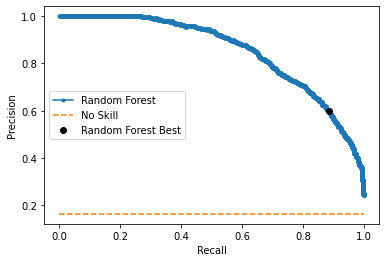

In [19]:
rf_best_fs = RandomForestClassifier(n_estimators=300,min_samples_leaf=20,min_samples_split=20,max_features='log2',max_depth=30, criterion='entropy')
rf_best_fs.fit(X_train_res_fs, y_train_res)
y_pred_rf_fs = rf_best_fs.predict_proba(X_train_fs)[:,1]

Random Forest FS
Best Threshold=0.475013, F-Score=0.808


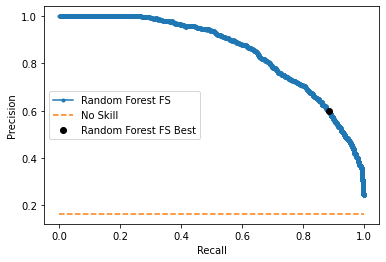

In [20]:
plot_precision_recall_curve(y_train, y_pred_rf_fs,'Random Forest FS')

In [21]:
feature_importance = list(zip(X_train_res.columns.values,rf_best_fs.feature_importances_))
rfimp_fs = Sort_Tuple(feature_importance)

In [22]:
rfimp_fs

[('Dependent_count', 0.018008825938647832),
 ('Education_Level', 0.03189094518460293),
 ('Income_Category', 0.047707578829249614),
 ('Customer_Age', 0.051452439598210824),
 ('Total_Relationship_Count', 0.19088316417658627),
 ('Card_Category', 0.2634872044344888),
 ('Months_on_book', 0.3965698418382137)]

In [ ]:
# total revolving balance, total transaction count, total_ct_chng_q4_q1

How much they spent. How many transactions they made in general 

## SVM

In [ ]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_res_fs, y_train_res)
y_pred = svm.predict(X_train_fs)
print(classification_report(y_train,y_pred))

In [23]:
param_grid = {
    # 1 / lambda, l2 penalty
    'C': [0.1, 1, 10, 100, 1000],
    'degree': [2,3,4],
    # kernel coefficient
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf']
}

In [ ]:
svc_fs = GridSearchCV(SVC(),param_grid,cv=3,scoring='recall')
svc_fs.fit(X_train_res_fs,y_train_res)
print(svc_fs.best_params_)

In [ ]:
print(classification_report(y_train_res,y_pred))

In [ ]:
svm.class_weight_
svm.classes_
svm.coef_
svm.support_vectors_

In [ ]:
Without finetuning, it seems that SVM has the best recall. 

## Logistic Regression

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_best_fs=GridSearchCV(logreg,grid,cv=10)
logreg_best_fs.fit(X_train_res_fs,y_train_res)
#y_pred_logreg_fs = logreg_best_fs.predict(X_train_fs)

#print(classification_report(y_train,y_pred_logreg_fs))
#print("tuned hpyerparameters :(best parameters) ",logreg_best_fs.best_params_)

In [ ]:
logreg_best_fs.best_params_
# {'C': 100.0, 'penalty': 'l2'}

In [ ]:
logreg_best_fs = LogisticRegression(C=100,penalty='l2')
logreg_best_fs.fit(X_train_res_fs,y_train_res)
y_pred_logreg_fs = logreg_best_fs.predict_proba(X_train_fs)[:,1]

In [ ]:
plot_precision_recall_curve(y_train,y_pred_logreg,'Logistic Regression FS')

In [ ]:
logreg_coef_fs = list(zip(X_train_res_fs.columns.values,logreg_best_fs.coef_[0]))
log_reg_coef_fs = Sort_Tuple(logreg_coef_fs)
log_reg_coef_fs

## ADABoost

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]
# Number of features to consider at every split
base_estimator = ['none',LogisticRegression()]
# Minimum number of samples required to split a node
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0]
# Minimum number of samples required at each leaf node
algorithm = ['SAMME', 'SAMME.R']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'base_estimator': base_estimator,
               'learning_rate': learning_rate,
              'algorithm': algorithm}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
ada = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
ada_grid= RandomizedSearchCV(estimator = ada, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
ada_grid.fit(X_train_res_fs, y_train_res)

In [ ]:
ada_grid.best_params_

In [ ]:
ada_best_fs = AdaBoostClassifier(n_estimators=300,learning_rate=.1,base_estimator=LogisticRegression(),algorithm='SAMME')
ada_best_fs.fit(X_train_res_fs, y_train_res)
y_pred_ada_fs = ada_best_fs.predict_proba(X_train_fs)[:,1]

In [ ]:
plot_precision_recall_curve(y_train,y_pred_ada_fs,'ADA Boost FS')

In [ ]:
ada_best_fs.

In [ ]:
ada_fimp_fs = Sort_Tuple(list(zip(X_train_res_fs.columns.values,ada_best_fs.feature_importances_)))
ada_fimp_fs

In [ ]:
## Precision-Recall Curves
alg = 'Logistic Regression FS'
# calculate p-r curves
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_logreg_fs)
# convert to f score
fscore = (5 * precision * recall) / (4 *precision+ recall)
# locate the index of the largest f score
ix = argmax(fscore)
print(alg)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot(recall, precision, marker='.', label=alg)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black',zorder=10)


alg = 'Random Forest FS'
# calculate p-r curves
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_rf_fs)
# convert to f score
fscore = (5 * precision * recall) / (4 *precision+ recall)
# locate the index of the largest f score
ix = argmax(fscore)
print(alg)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot(recall, precision, marker='.', label=alg)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black',zorder=10)

alg = 'ADA Boost FS'
# calculate p-r curves
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_ada_fs)
# convert to f score
fscore = (5 * precision * recall) / (4 *precision+ recall)
# locate the index of the largest f score
ix = argmax(fscore)
print(alg)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot(recall, precision, marker='.', label=alg)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black',zorder=10)

# alg = 'Gradient Boost FS'
# # calculate p-r curves
# precision, recall, thresholds = precision_recall_curve(y_train, y_pred_gboost)
# # convert to f score
# fscore = (5 * precision * recall) / (4 *precision+ recall)
# # locate the index of the largest f score
# ix = argmax(fscore)
# print(alg)
# print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# # plot the roc curve for the model
# no_skill = len(y_train[y_train==1]) / len(y_train)
# pyplot.plot(recall, precision, marker='.', label=alg)
# pyplot.scatter(recall[ix], precision[ix], marker='o', color='black',zorder=10)




# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Identifying Key Factors

In [ ]:
## Without Feature Selection

In [ ]:
display(ada_fimp_fs)
print()
display(randfor_fs)
print()
log_reg_coef_fs

In [ ]:
## With Feature Selection